In [ ]:
!pip install rasterio
import rasterio
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Load the GeoTIFF file
file_path = "SLMO0_2016_0_1_GeoTIFF.tif"


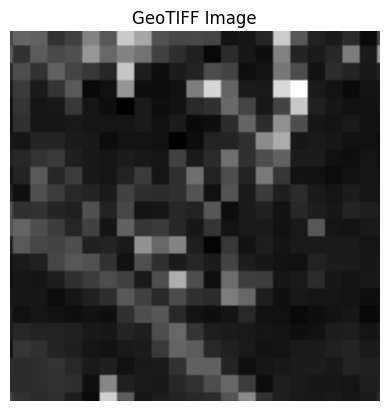

Final Tensor shape: torch.Size([12, 128, 128])


In [ ]:
with rasterio.open(file_path) as src:
    # Read the data
    image = src.read()  # Shape: (channels, height, width)

# Function to display an image
def show_image(image):
    if image.shape[0] == 3:  # RGB
        plt.imshow(image.transpose(1, 2, 0))  # Transpose for height, width, channels
    else:  # Single channel
        plt.imshow(image[0], cmap="gray")
    plt.title("GeoTIFF Image")
    plt.axis("off")
    plt.show()

# Preprocess function to crop exactly a 128x128 region
def preprocess(image, crop_size=128, offset=(0, 0)):
    """
    Preprocess the GeoTIFF image:
    - Crops a 128x128 region starting from the given offset.

    Args:
    image (numpy.ndarray): The GeoTIFF image (channels, height, width).
    crop_size (int): The size of the crop (must be 128 for this task).
    offset (tuple): The (x, y) offset from the upper-left corner for cropping.

    Returns:
    torch.Tensor: A cropped PyTorch tensor.
    """
    x_offset, y_offset = offset
    cropped_image = image[
        :,  # All channels
        y_offset:y_offset + crop_size,  # Height crop
        x_offset:x_offset + crop_size   # Width crop
    ]

    # Convert to PyTorch tensor
    image_tensor = torch.tensor(cropped_image, dtype=torch.float32)

    # Normalize the tensor (optional, adjust as needed)
    normalize = transforms.Normalize(
        mean=[image_tensor[channel].mean().item() for channel in range(image_tensor.shape[0])],
        std=[image_tensor[channel].std().item() for channel in range(image_tensor.shape[0])]
    )
    image_tensor = normalize(image_tensor)
    return image_tensor

# Apply preprocessing
offset = (0, 0)  # Start cropping from the top-left corner
image_tensor = preprocess(image, crop_size=128, offset=offset)

# Show the cropped region
show_image(image[:, offset[1]:offset[1] + 128, offset[0]:offset[0] + 128])

# Print final tensor shape
print("Final Tensor shape:", image_tensor.shape)

In [ ]:
mask_path = "SLMO0_2016_0_1_GeoTIFF_fractional_mask.tif"

In [ ]:
with rasterio.open(mask_path) as src:
    # Read the data
    image2 = src.read()  # Shape: (channels, height, width)

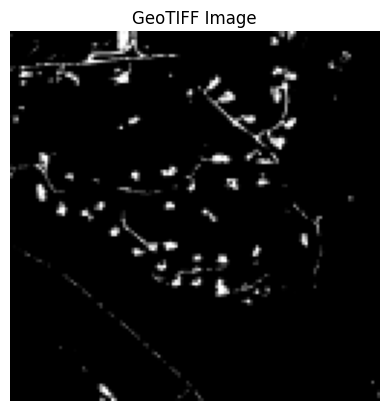

Final Tensor shape: torch.Size([5, 128, 128])


In [ ]:
# Apply preprocessing
offset = (0, 0)  # Start cropping from the top-left corner
image_tensor2 = preprocess(image2, crop_size=128, offset=offset)

# Show the cropped region
show_image(image2[:, offset[1]:offset[1] + 128, offset[0]:offset[0] + 128])

# Print final tensor shape
print("Final Tensor shape:", image_tensor2.shape)